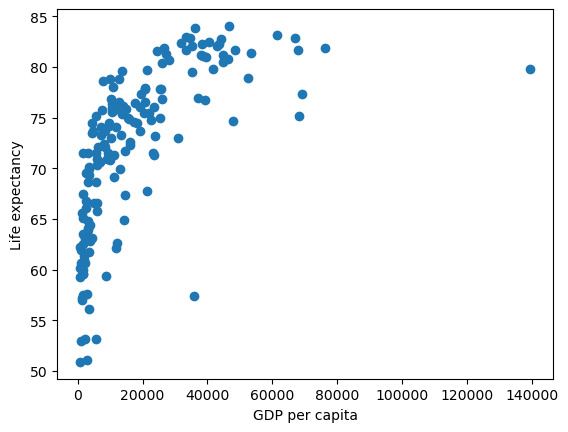

,Entity,Code,Year,GDP per capita,Life expectancy
6,Australia,AUS,2015,44336,82.794
7,Austria,AUT,2015,44845,81.182
13,Belgium,BEL,2015,39531,80.969
24,Canada,CAN,2015,42844,82.026
37,Cyprus,CYP,2015,25903,80.350
39,Denmark,DNK,2015,44939,80.475
49,Finland,FIN,2015,37920,81.196
50,France,FRA,2015,38448,82.224
54,Germany,DEU,2015,46426,80.770
56,Greece,GRC,2015,24545,81.548


,Entity,Code,Year,GDP per capita,Life expectancy
1,Albania,ALB,2015,10947,78.025
2,Algeria,DZA,2015,13024,76.090
4,Argentina,ARG,2015,19316,76.068
11,Barbados,BRB,2015,10030,78.801
16,Bosnia and Herzegovina,BIH,2015,10305,76.865
28,Chile,CHL,2015,21340,79.646
30,Colombia,COL,2015,12858,76.531
33,Costa Rica,CRI,2015,13568,79.565
35,Croatia,HRV,2015,20905,77.892
36,Cuba,CUB,2015,7889,78.561


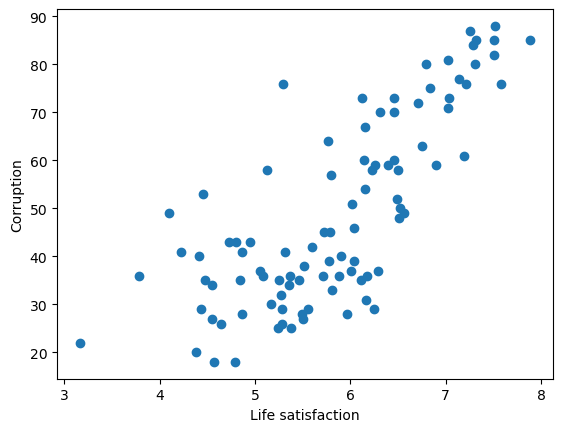

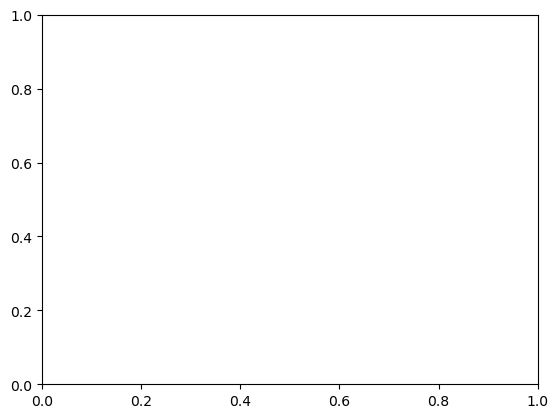

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

gdp = pd.read_csv("./datasets/GDP-2015.csv")
le = pd.read_csv("./datasets/life-expectancy.csv")

le = le[le["Year"] == 2015]
le = le.drop(columns = ["Code", "Year"]) # Remove duplicate colums

gdp = gdp.merge(le, left_on="Entity", right_on="Entity") # Merge life expectancy and GDP

world_index = gdp["Entity"].tolist().index("World")
gdp.drop([world_index, world_index+1]) # Remove the totaled world data

x = np.array(gdp["GDP per capita"])
y = np.array(gdp["Life expectancy"])

plt.scatter(x,y)
plt.xlabel("GDP per capita")
plt.ylabel("Life expectancy")
plt.show()

lestd = np.std(gdp["Life expectancy"]) # Compoute standard diveation
lemean = np.mean(gdp["Life expectancy"]) # Compoute mean

tmp = gdp[gdp["Life expectancy"] >= lemean + lestd] 
display(tmp) # Countries that have life expectancy higher than one standard deviation above the mean

tmp = gdp[gdp["Life expectancy"] >= lemean + lestd/2]
tmp = tmp[tmp["GDP per capita"] <= 35000]
display(tmp)# Countries that have high life expectancy but have low GDP

# --------- Corruption vs Life satisfaction ---------

cor = pd.read_csv("./datasets/TI-corruption-perception-index.csv")
hap = pd.read_csv("./datasets/happiness-cantril-ladder.csv")

cor = cor[cor["Year"] == 2018]
hap = hap[hap["Year"] == 2018]
hap = hap.drop(columns = ["Code", "Year"]) # Remove duplicate colums

cor = cor.merge(hap, left_on="Entity", right_on="Entity") # Merge life expectancy and GDP

xs = np.array(cor["Life satisfaction"])
ys = np.array(cor["Corruption"])
zs = np.array(cor["Entity"])

plt.scatter(xs,ys)
plt.xlabel("Life satisfaction")
plt.ylabel("Corruption")
plt.show()

#for x,y,z in zip(xs,ys, zs):
#    label = f"{z}"
#    plt.annotate(label, (x,y), textcoords="offset points", xytext=(10,0), ha='left') 
plt.annotate("Hong Kong", (5.29534149169922,76), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Zimbabwe", (3.15980219841003,22), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Sweden", (7.31434106826782,85), textcoords="offset points", xytext=(10,0), ha='left')
plt.annotate("Denmark", (7.5146312713623,88), textcoords="offset points", xytext=(10,0), ha='left')

# --------- Vaccination vs Covid Deaths ---------

vac = pd.read_csv("./datasets/global-vaccination-coverage.csv")
cov = pd.read_csv("./datasets/owid-covid-data.csv")
